In [1]:
%matplotlib notebook 
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('/home/dana_z/ssd_2TB/6OHDA')
#import mpld3
#mpld3.enable_notebook()
import numpy as np
import scipy as sci
from scipy.fftpack import fft
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import gridspec
import sys
import h5py
from IO import *
from utils import *
from plotUtils import *
from ColorSchems import colorPallet as CP
import pptx
from pptx import Presentation 
from pptx.util import Inches
from io import BytesIO
import re
import warnings

<h1> Aim 1a Figure </h1>

In [222]:
dataFile = 'Data_6OHDA_H_Homomorphic.h5';
#dataFile = 'Data_6OHDA_longLFP.h5';
#dataFile = 'Data_6OHDA_H_all.h5';

In [223]:
PVdataH = getData(dataFile,['speed','trace'],period ='Pre', cre='PV',red = True,day = lambda x: x==0)
PVdataP = getData(dataFile,['speed','trace'],period ='Pre', cre='PV',red = True,day = lambda x: x>0)
MSNdataH = getData(dataFile,['speed','trace'],period ='Pre',red = False,day = lambda x: x==0)
MSNdataP = getData(dataFile,['speed','trace'],period ='Pre',red = False,day = lambda x: x>0)
CHIdataH = getData(dataFile,['speed','trace'],period ='Pre', cre='CHI',red = True,day = lambda x: x==0)
CHIdataP = getData(dataFile,['speed','trace'],period ='Pre', cre='CHI',red = True,day = lambda x: x>0)

cleaning up trace data
cleaning up trace data
cleaning up speed data
cleaning up trace data
I deleted session: 1236_day19L
I deleted session: 1236_day7
I deleted session: 4539_day11
I deleted session: 4539_day15A
cleaning up trace data
cleaning up speed data
cleaning up trace data
cleaning up speed data
cleaning up trace data
cleaning up speed data
cleaning up trace data
I deleted session: 1208_BaselineA
I deleted session: 1222_BaselineA
I deleted session: 1253_BaselineA
I deleted session: 1793_BaselineA
cleaning up trace data
cleaning up speed data
cleaning up trace data
I deleted session: 0761_day1
I deleted session: 0761_day12
I deleted session: 0761_day14A
I deleted session: 0761_day2
I deleted session: 0761_day31A
I deleted session: 1208_day12
I deleted session: 1208_day4
I deleted session: 1208_day8
I deleted session: 1222_day11
I deleted session: 1222_day13
I deleted session: 1222_day20L
I deleted session: 1222_day36L
I deleted session: 1222_day5
I deleted session: 1222_day7
I d

<IPython.core.display.Javascript object>


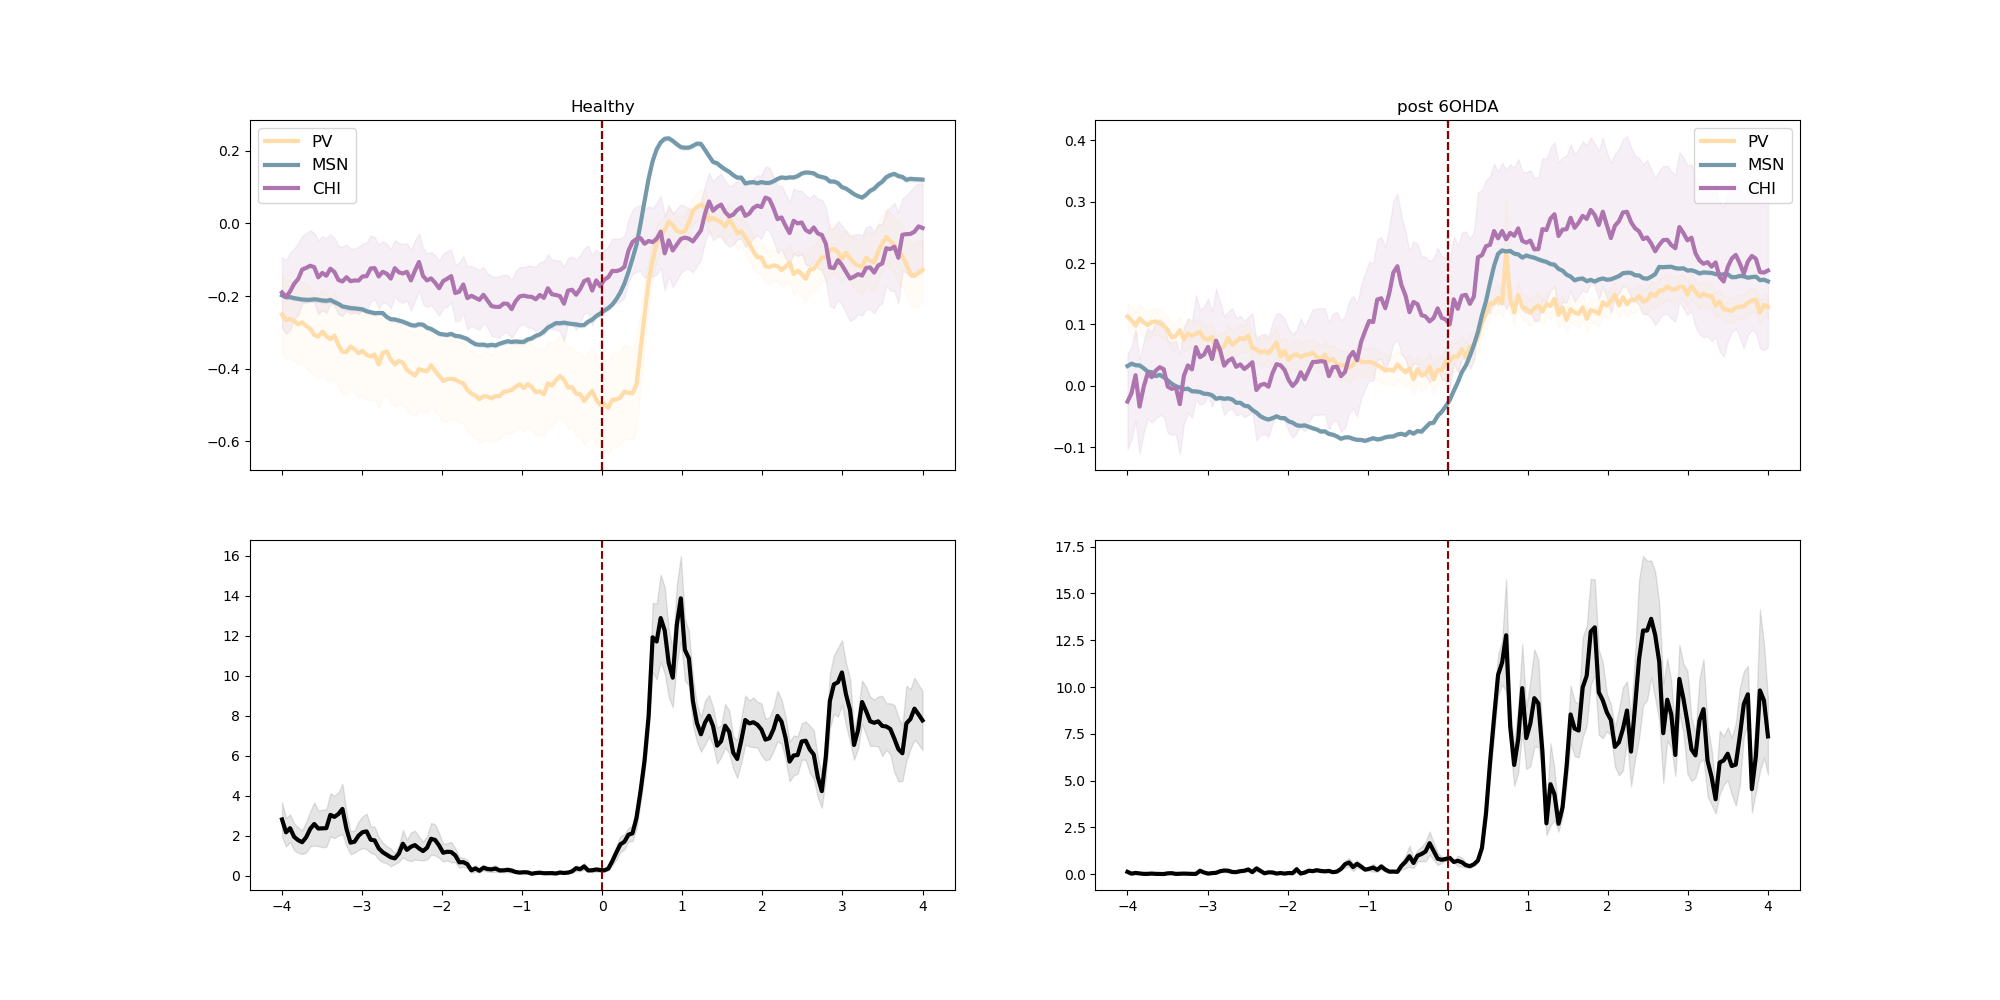

/home/dana_z/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dana_z/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/dana_z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


Text(0.5,1,'post 6OHDA')

In [5]:
# intialize figure and colors:
fig, ax = plt.subplots(2,2,figsize=(20, 10),sharex='col')
Colors = CP('creType')

#cond = ['PVdataH','PVdataP','MSNdataH','MSNdataP','CHIdataH','CHIdataP']
cond = ['PVdataH','MSNdataH','CHIdataH','PVdataP','MSNdataP','CHIdataP']
Names = {'PVdataH':'PV - healthy','PVdataP':'PV - post 6OHDA',
         'MSNdataH':'MSN - healthy','MSNdataP':'MSN - post 6OHDA',
         'CHIdataH':'CHI - healthy','CHIdataP':'CHI - post 6OHDA'}

# set the time range to plot: (Assuming all data is in 20Hz, if dataset changes, change this!)
preS = 80 #2s
PostS = 80 # 2s
dt = 0.05

tPlot = np.linspace(-preS*dt,PostS*dt,preS+PostS)

# set mvmt onset params: 
th = 2
hi = 9 
hiWin=40 
thWin=30
shift=2

for c in cond:
    data = eval(c)
    for s in data.keys():
        speed = data[s]['speed']['speed'].T
        dff = data[s]['trace']['dff']
        # Vectors are saved as column vectors so.. transposed to raw vector
        if dff.shape[1] == 1:
            dff = dff.T
        # Z-score dff
        mu = np.mean(dff,axis=1)
        std = np.std(dff,axis=1)
        Zdff = (dff.T-mu.T)/std.T
        Zdff = Zdff.T  
        
        
        sOnset = FindMvmtOnset(speed,th,hi,hiWin,thWin, shift)        
        sA = alignToOnset(Zdff.T, sOnset, winPost=PostS,winPre=preS)       
        if len(sA.shape) > 2:
            sA = np.mean(sA,2)
            if 'sAligned' not in locals():
#               print(s+' :',sA.shape)
                sAligned = sA
            else:
#                print(s+' :',sA.shape,sAligned.shape)
                sAligned = np.concatenate((sAligned,sA),axis=1)

    if c[-1]=='H':
        PlotRelativeToOnset(ax[0,0],sAligned,tPlot,Color=Colors[c[0:-5]],Label=c[0:-5],mesErr=True)
        sS = alignToOnset(speed, sOnset, winPost=PostS,winPre=preS)
        if sS.ndim > 1:
            if 'sAlignedS' not in locals():
    #           print(s+' :',sA.shape)
                sAlignedS = sS
            else:
#                print(s+' :',cAs.shape,caAlignedS.shape)
                sAlignedS = np.concatenate((sAlignedS,sS),axis=1)
    else: 
        PlotRelativeToOnset(ax[0,1],sAligned,tPlot,Color=Colors[c[0:-5]],Label=c[0:-5],mesErr=True)
        sSP = alignToOnset(speed, sOnset, winPost=PostS,winPre=preS)
        if sS.ndim > 1:
            if 'sAlignedSP' not in locals():
    #           print(s+' :',sA.shape)
                sAlignedSP = sSP
            else:
#                print(s+' :',cAs.shape,caAlignedS.shape)
                sAlignedSP = np.concatenate((sAlignedSP,sSP),axis=1)
    del sAligned
PlotRelativeToOnset(ax[1,1],sAlignedSP,tPlot,Color='black',Label='speed',mesErr=True)
PlotRelativeToOnset(ax[1,0],sAlignedS,tPlot,Color='black',Label='speed',mesErr=True)
ax[0,0].legend(fontsize=12)
ax[0,0].set_title('Healthy')
ax[0,1].legend(fontsize=12)
ax[0,1].set_title('post 6OHDA')

<IPython.core.display.Javascript object>


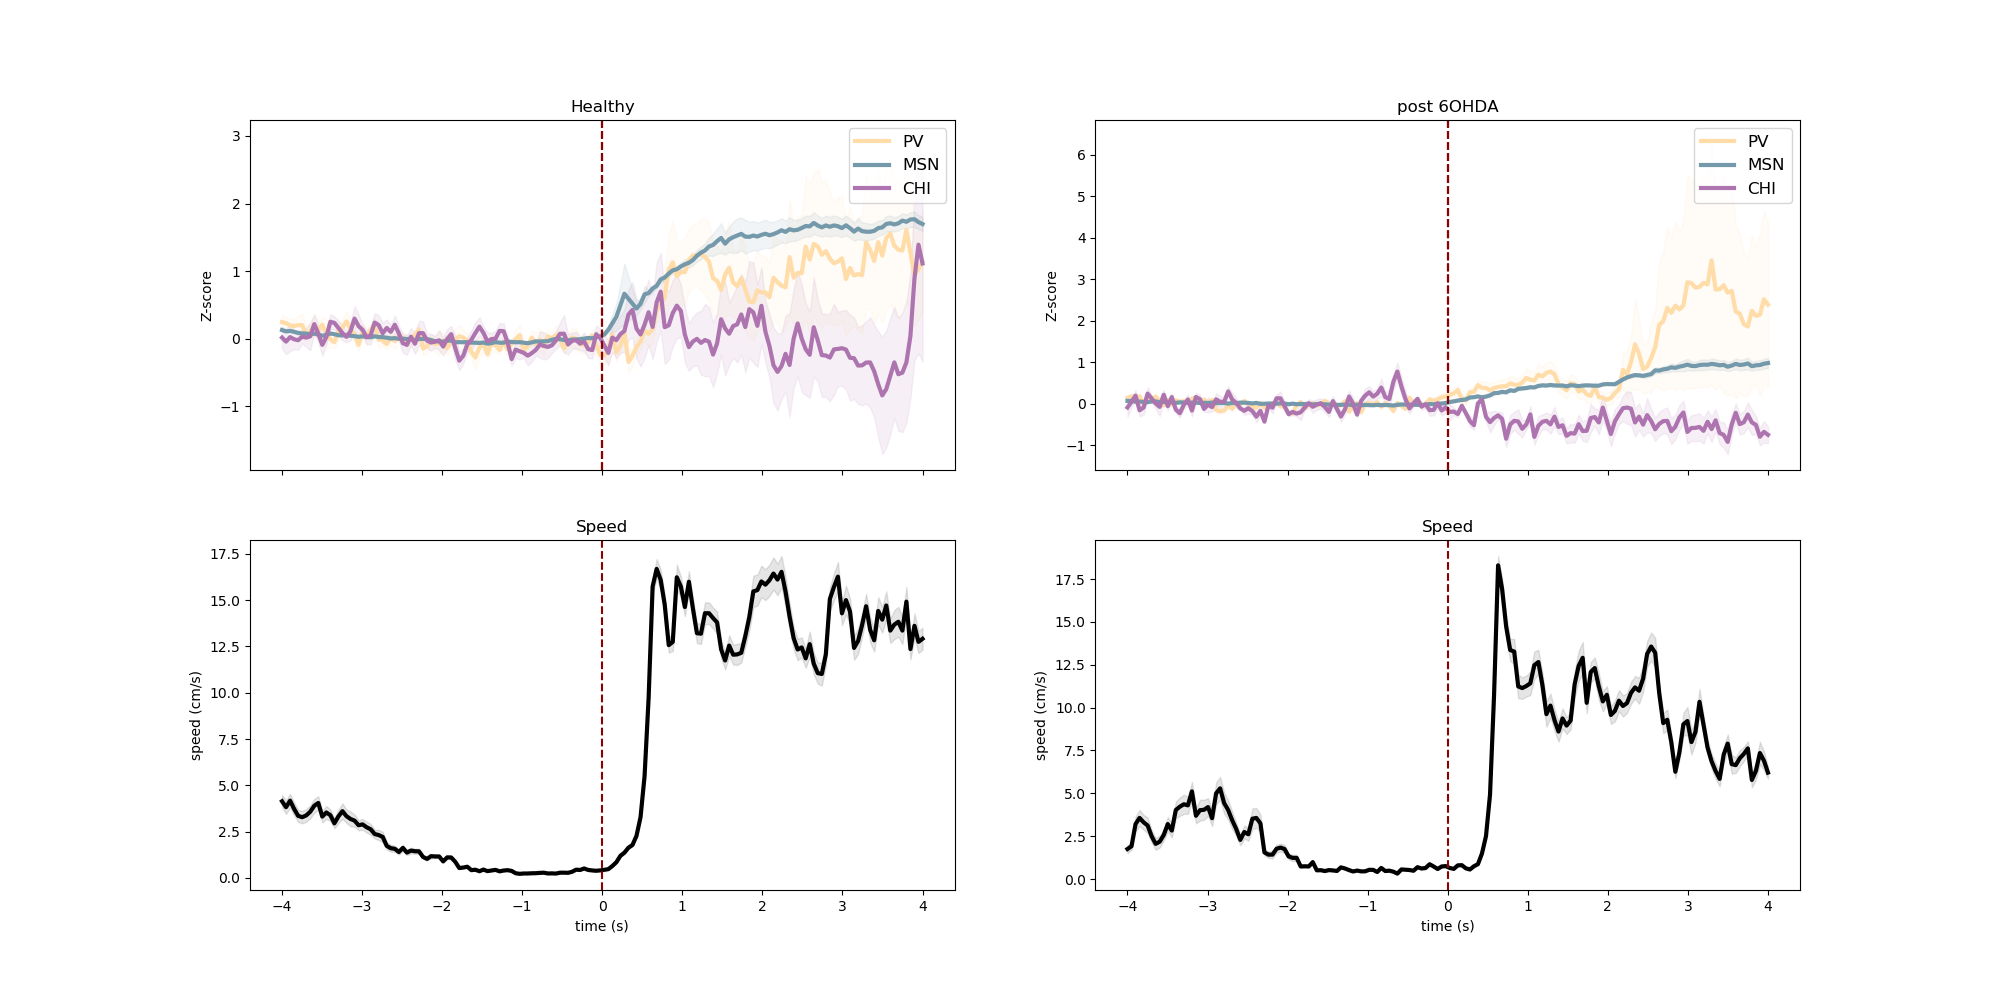

/home/dana_z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: RuntimeWarning: Mean of empty slice


Text(0,0.5,'speed (cm/s)')

In [224]:
# intialize figure and colors:
fig, ax = plt.subplots(2,2,figsize=(20, 10),sharex='col')
Colors = CP('creType')

#cond = ['PVdataH','PVdataP','MSNdataH','MSNdataP','CHIdataH','CHIdataP']
cond = ['PVdataH','MSNdataH','CHIdataH','PVdataP','MSNdataP','CHIdataP']
#cond = ['MSNdataH']#,'MSNdataP']
Names = {'PVdataH':'PV - healthy','PVdataP':'PV - post 6OHDA',
         'MSNdataH':'MSN - healthy','MSNdataP':'MSN - post 6OHDA',
         'CHIdataH':'CHI - healthy','CHIdataP':'CHI - post 6OHDA'}

# set the time range to plot: (Assuming all data is in 20Hz, if dataset changes, change this!)
preS = 80 #2s
PostS = 80 # 2s
dt = 0.05

tPlot = np.linspace(-preS*dt,PostS*dt,preS+PostS)

# set mvmt onset params: 
th = 2
hi = 9 
hiWin=40 
thWin=30
shift=2

for c in cond:
    data = eval(c)
    for s in data.keys():
        speed = data[s]['speed']['speed'].T
        dff = data[s]['trace']['dff']
        # Vectors are saved as column vectors so.. transposed to raw vector
        if dff.shape[1] == 1:
            dff = dff.T
        # Z-score dff
 #       mu = np.mean(dff,axis=1)
 #       std = np.std(dff,axis=1)
 #       Zdff = (dff.T-mu.T)/std.T
 #       Zdff = dff  
        
        
        sOnset = FindMvmtOnset(speed,th,hi,hiWin,thWin, shift)        
        sA = alignToOnset(dff.T, sOnset, winPost=PostS,winPre=preS)       
        if len(sA.shape) > 2:
            mu = np.nanmean(sA[0:80,:,:],axis=0)
            td = np.nanstd(sA[0:80,:,:],axis=0)
            sA= np.delete(sA, np.unique(np.where(td==0)[0]), axis=1)
            mu= np.delete(mu, np.unique(np.where(td==0)[0]), axis=0)
            td= np.delete(td, np.unique(np.where(td==0)[0]), axis=0)
            Z = (sA-mu)/td
            sA2 = np.nanmean(Z,axis=2)
            if 'sAligned' not in locals():
#               print(s+' :',sA.shape)
                sAligned = sA2
            else:
#                print(s+' :',sA.shape,sAligned.shape)
                sAligned = np.concatenate((sAligned,sA2),axis=1)

    if c[-1]=='H':
        PlotRelativeToOnset(ax[0,0],sAligned,tPlot,Color=Colors[c[0:-5]],Label=c[0:-5],mesErr=True)
        sS = alignToOnset(speed, sOnset, winPost=PostS,winPre=preS)
        if sS.ndim > 1:
            if 'sAlignedS' not in locals():
    #           print(s+' :',sA.shape)
                sAlignedS = sS
            else:
#                print(s+' :',cAs.shape,caAlignedS.shape)
                sAlignedS = np.concatenate((sAlignedS,sS),axis=1)
    else: 
        PlotRelativeToOnset(ax[0,1],sAligned,tPlot,Color=Colors[c[0:-5]],Label=c[0:-5],mesErr=True)
        sSP = alignToOnset(speed, sOnset, winPost=PostS,winPre=preS)
        if sS.ndim > 1:
            if 'sAlignedSP' not in locals():
    #           print(s+' :',sA.shape)
                sAlignedSP = sSP
            else:
#                print(s+' :',cAs.shape,caAlignedS.shape)
                sAlignedSP = np.concatenate((sAlignedSP,sSP),axis=1)
   
    del sAligned
PlotRelativeToOnset(ax[1,1],sAlignedSP,tPlot,Color='black',Label='speed',mesErr=True)
PlotRelativeToOnset(ax[1,0],sAlignedS,tPlot,Color='black',Label='speed',mesErr=True)
ax[0,0].legend(fontsize=12)
ax[0,0].set_title('Healthy')
ax[0,1].legend(fontsize=12)
ax[0,1].set_title('post 6OHDA')
ax[1,0].set_title('Speed')
ax[1,1].set_title('Speed')
ax[0,0].set_ylabel('Z-score')
ax[0,1].set_ylabel('Z-score')
ax[1,0].set_xlabel('time (s)')
ax[1,1].set_xlabel('time (s)')
ax[1,0].set_ylabel('speed (cm/s)')
ax[1,1].set_ylabel('speed (cm/s)')

<h1> Aim 1b figures </h1>

<b> Beta Mice </b>

In [3]:
#dataFile = 'Data_6OHDA_longLFP.h5';
dataFile = 'Data_6OHDA_H_all.h5';

In [78]:
baselines = getData(dataFile,['lfp'],period ='Pre',mice = ['8430','4539','7909','7584'],day = lambda x: int(x)==0)
early = getData(dataFile,['lfp'],period ='Pre',mice = ['8430','4539','7909','7584'],day = lambda x: (int(x)<= 4) & (x>0))
mid = getData(dataFile,['lfp'],period ='Pre',mice = ['8430','4539','7909','7584'],day = lambda x: (int(x)> 5) & (x<=8))
late = getData(dataFile,['lfp'],period ='Pre',mice = ['8430','4539','7909','7584'],day = lambda x: (int(x)> 9) & (x<=14))

cleaning up lfp data
I deleted session: 4539_BaselineA
cleaning up lfp data
cleaning up lfp data
cleaning up lfp data
I deleted session: 7584_day12


In [73]:
def getPowerSpec(lfpDict):
    # This function takes in a dict with lfp data (that was returned from getData())
    # and returns the average power spectra
    # Inputs: 
    #   lfpDict - a dictionary with lfp data as returned from getData()
    # Outputs:
    #   M - mean power spectra
    #   Std - standard diviation of power spectra
    #   f - frequency list

    data = []
    for j in lfpDict:
        lfp = lfpDict[j]['lfp']['lfp']
        f, t, Sxx = signal.spectrogram(lfp[:,0],lfpDict[j]['lfp']['FS'],window=('hamming'),nperseg=140,noverlap =120,nfft=1200)
       
        
        Power = np.sum(Sxx,1)
        totPower = np.sum(Power)
        if totPower == 0:
            continue
            
        #beta = np.mean(getPowerInBand(f,Sxx,13,20)/np.sum(Sxx,axis = 0)
        data.append(Power/totPower)    



    data = np.array(data)
    M = np.mean(data,axis=0)
    Std = np.std(data, axis = 0)/data.shape[0]
    return M, Std, f

/home/dana_z/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


<IPython.core.display.Javascript object>


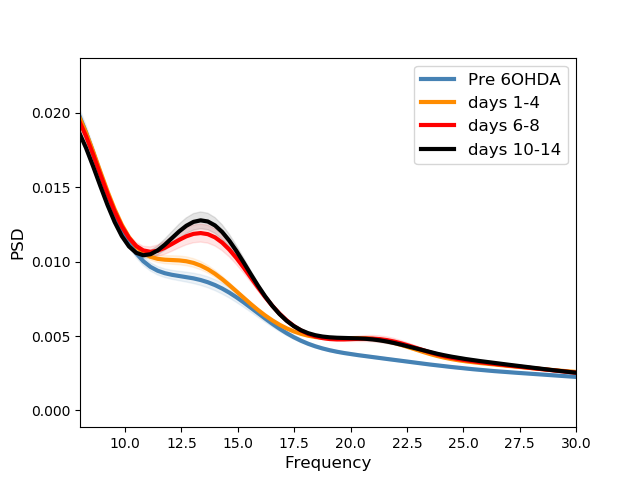

(8, 30)

In [81]:
cond = ['baselines','early','mid','late']
Names = {'baselines':'Pre 6OHDA','early':'days 1-4','mid':'days 6-8' ,'late':'days 10-14'}
Colors = {'baselines':'steelblue','early':'darkorange','mid':'red' ,'late':'black'}

for c in cond:
    M,Std, f = getPowerSpec(eval(c))
    plt.plot(f, M, linewidth=3,color=Colors[c],label=Names[c])
    plt.fill_between(f, M-Std, M+Std,color=Colors[c],alpha=0.1)
plt.ylabel('PSD',fontsize=12)
plt.xlabel('Frequency',fontsize=12)
plt.legend(fontsize=12)
plt.xlim((8,30))

In [62]:
def getPowerSpec(lfpDict):
    # This function takes in a dict with lfp data (that was returned from getData())
    # and returns the average power spectra
    # Inputs: 
    #   lfpDict - a dictionary with lfp data as returned from getData()
    # Outputs:
    #   M - mean power spectra
    #   Std - standard diviation of power spectra
    #   f - frequency list

    data = []
    for j in lfpDict:
        lfp = lfpDict[j]['lfp']['lfp']
        Fs = lfpDict[j]['lfp']['FS']
        N = len(lfp)
     # sample spacing
        T = 1.0 / Fs
        yf = fft(lfp)
        f = np.linspace(0.0, 1.0/(2.0*T), N//2)
        Power = 2.0/N * np.abs(yf[0:N//2])
       
        totPower = np.sum(Power)
        if totPower == 0:
            continue
         
        f100 = int(np.floor(100/T)[0])
        print(f100, len(Power))
        #beta = np.mean(getPowerInBand(f,Sxx,13,20)/np.sum(Sxx,axis = 0)
        data.append(Power[:f100]/totPower)    



    data = np.array(data)
    M = np.mean(data,axis=0)
    Std = np.std(data, axis = 0)
    return M[:,0], Std[:,0], f[:f100]

In [59]:
data = []
for j in lfpDict:
    lfp = lfpDict[j]['lfp']['lfp']
    Fs = lfpDict[j]['lfp']['FS']
    N = len(lfp)
 # sample spacing
    T = 1.0 / Fs
    yf = fft(lfp)
    f = np.linspace(0.0, 1.0/(2.0*T), N//2)
    Power = 2.0/N * np.abs(yf[0:N//2])

    totPower = np.sum(Power)
    if totPower == 0:
        continue

    f100 = int(np.floor(100/T)[0])
    print(f100, len(Power))
    #beta = np.mean(getPowerInBand(f,Sxx,13,20)/np.sum(Sxx,axis = 0)
    data.append(Power[:f100]/totPower)    



data = np.array(data)


305175 907838
305175 907838
305175 907840
305175 435116
305175 907896
305175 907850
305175 907868
305175 907890
305175 907852
305175 907868


<IPython.core.display.Javascript object>


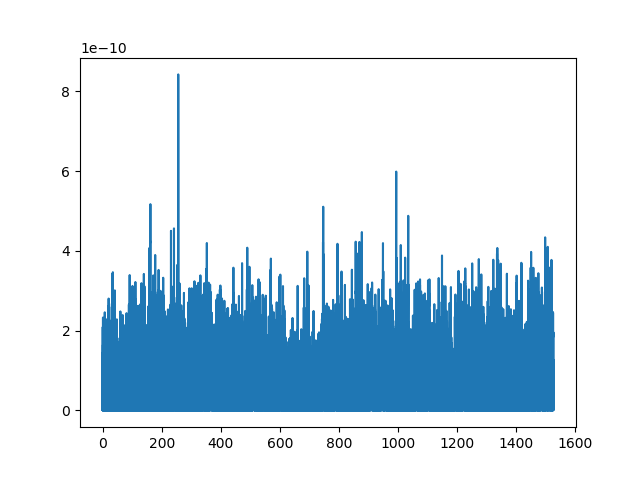

In [34]:
plt.plot(f,2.0/N * np.abs(Power[0:N//2]))

In [61]:
data.shape
M = np.mean(data,axis=0)
Std = np.std(data, axis = 0)


<h2> Data Example for ppt </h2>

In [4]:
data = getData(dataFile,['lfp','trace','speed'],period ='Pre',mice = ['8430'],day = lambda x: int(x)==0)


cleaning up trace data
cleaning up lfp data
cleaning up speed data


In [22]:
def pFind(a,func):
    try:
        j = next(i for i,v in enumerate(a) if func(v))
    except StopIteration :
        j = a.shape[0]
    return j

In [35]:
#Data.keys()
#data = Data['8430_BaselineA']
#lfp = data['lfp']['lfp']

print(data['speed']['speed'].shape)

(1, 11899)


<IPython.core.display.Javascript object>


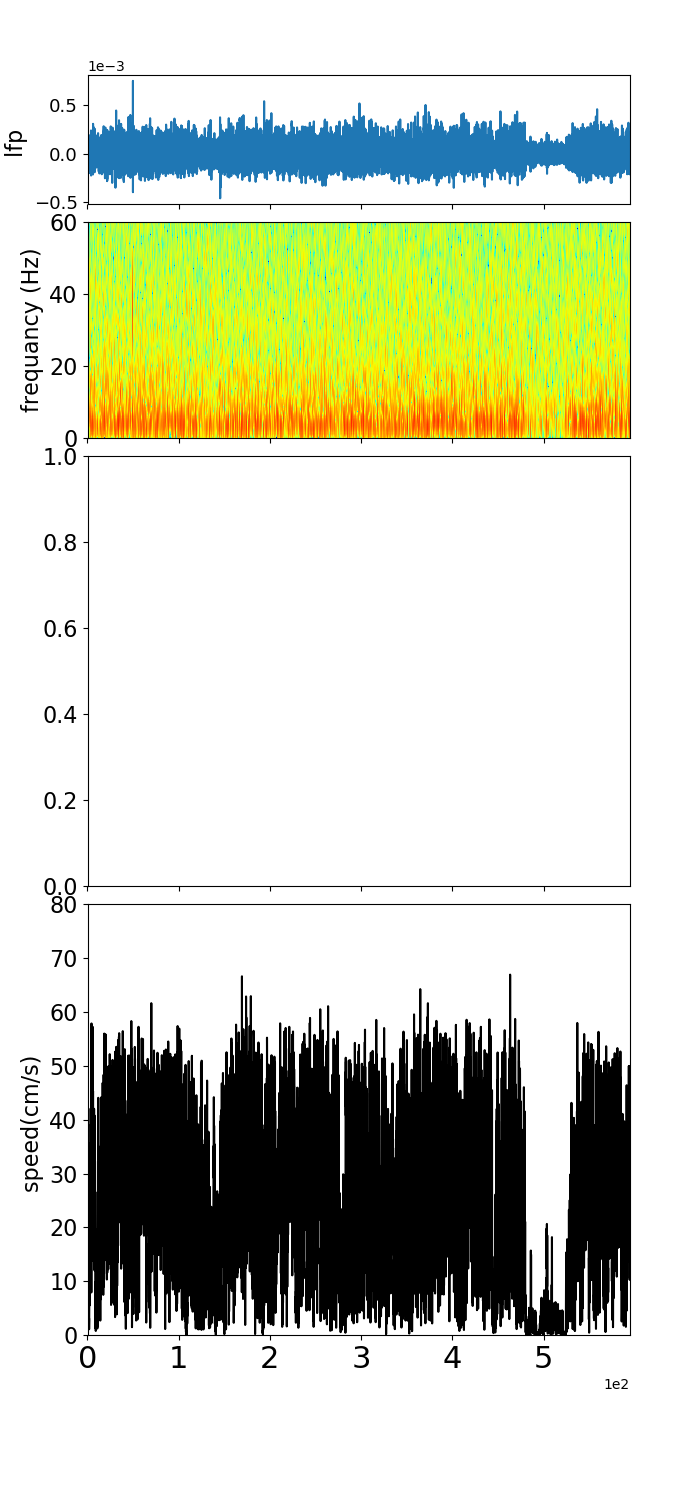

/home/dana_z/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


In [60]:
data = Data['8430_BaselineA']
lfp = data['lfp']['lfp']
lfpFs = data['lfp']['FS']
dt = 1/data['trace']['FS']
dff = data['trace']['dff']
N = dff.shape[1]
dff = dff.T
t_ca = np.linspace(0.0, dt*(N-1), N)
speed = data['speed']['speed'].T
axis=0
title=""

fig, ax = plt.subplots(4,1,figsize=(7, 15),sharex='col',
                       gridspec_kw = {'height_ratios':[0.3,0.5,1,1],'top':0.95,
                                      'hspace':0.06,'wspace':0.3})

f, t, Sxx = signal.spectrogram(lfp[:,0], lfpFs[0],window=('hamming'),nperseg=140,noverlap =120,nfft=1200)
Pxx = 10*np.log10(np.abs(Sxx))
Pxx[np.isinf(Pxx)] = 0 #problem with the windowing?

end_lfp = pFind(t,lambda x: x>np.max(t_ca))-1
start_lfp = 0
endP = t_ca.shape[0]
numN = dff.shape[1]

tlfp = np.linspace(0,lfp.size*(1/lfpFs[0]),lfp.size)
end_lfp1 = pFind(tlfp,lambda x: x>np.max(t_ca))-1
start_lfp1 = pFind(tlfp,lambda x: x>np.min(t_ca))-1

ax[0].plot(tlfp[start_lfp1:end_lfp1],lfp[start_lfp1:end_lfp1])
ax[0].set_ylabel('lfp ',fontsize=16)
ax[0].set_xlim(xmax=t[end_lfp],xmin=t[start_lfp])
ax[0].set_title(title,fontsize=22)

ax[1].pcolormesh(t[start_lfp:end_lfp],f,Pxx[:,start_lfp:end_lfp],vmin=-170,vmax=-70, cmap='jet')
ax[1].set_ylim(ymax=60)
ax[1].set_ylabel('frequancy (Hz)',fontsize=16)
#ax[2].pcolormesh(t_ca,np.linspace(1,numN,numN),dff.transpose(),vmin=0,vmax=4)

ax[3].plot(t_ca[:-1],speed,color='black')
ax[3].set_ylabel('speed(cm/s) ',color='black',fontsize=16)
ax[3].set_ylim((0,80))

#ax3 = ax[3].twinx()
#ax3.plot(t_ca[:,0],np.sum(dff,1),color='blue')
#ax3.set_ylabel(r'$\Delta$f/f',color='blue',fontsize=16)

ax[3].tick_params(axis = 'y',labelsize=16)
#ax3.tick_params(axis = 'y',labelsize=16)
ax[3].tick_params(axis = 'x',labelsize=22)
ax[2].tick_params(axis = 'y',labelsize=16)
ax[1].tick_params(axis = 'y',labelsize=16)
ax[0].tick_params(axis = 'y',labelsize=13)
ax[0].ticklabel_format(style='sci',scilimits=(0,0))

In [41]:
print(dff.shape,speed.shape,t_ca.shape )

(11900, 179) (11899, 1) (11900,)
